# Constraint Consistency from Luminosity Function Fitting

In [1]:
import corner
import h5py
import numpy as np
from IPython.display import display, Math
from matplotlib import pyplot as plt

from conf import PATHOUT
from application.pipeline.plot_constraints import gradient_colour_map, plot_2d_constraints

Load relativistic bias parameter chains from sampled luminosity function.

In [2]:
model = np.random.choice(['PLE_model'])  # 'PLE_model', hybrid_model'
redshift = "2.00"  # "0.87", "2.00", "3.75"
threshold = "-25.0"  # "-22.0", "-25.0"

print("Selected: {}, redshift {}, magnitude limit {}".format(model, redshift, threshold))

Selected: PLE_model, redshift 2.00, magnitude limit -25.0


In [3]:
data_root = "eBOSS_QSO_LF_{}_zeus".format(model.split("_")[0])
chain_root = "1596047_20_2E5_by1"

this_work = "relbias_z{}_m{}_{}_poisson_{}.h5".format(
    redshift, threshold, data_root, chain_root
)
shifted_samples = "relbias_z{}_m{}_{}_poisson_shifted_{}.h5".format(
    redshift, threshold, data_root, chain_root
)

In [4]:
if 100 * float(redshift) % 10:
    subdir = "eBOSS_binning"
else:
    subdir = "dense_points/bias"
with h5py.File(PATHOUT/"publication"/model/subdir/this_work, 'r') as chain_file:
    this_work_chain = chain_file['extract/chain'][()]
with h5py.File(PATHOUT/"publication"/model/"shifted"/shifted_samples, 'r') as chain_file:
    shifted_chain = chain_file['extract/chain'][()]

Plot constraints.

In [5]:
estimate_str = lambda source, x_estimate, y_estimate: (
    r"\text{{{}: }} "
    r"b_\mathrm{{e}} = {:.1f}_{{-{:.1f}}}^{{+{:.1f}}}, "
    r"s = {:.3f}_{{-{:.3f}}}^{{+{:.3f}}}"
).format(
    source.capitalize(),
    x_estimate[0], x_estimate[0] - x_estimate[1], x_estimate[-1] - x_estimate[0],
    y_estimate[0], y_estimate[0] - y_estimate[1], y_estimate[-1] - y_estimate[0],
)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

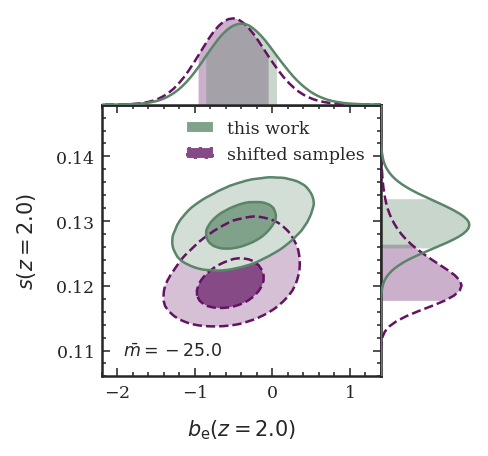

In [6]:
fig, x_estimate, y_estimate, *_ = plot_2d_constraints(
    shifted_chain, bins=200, smooth=0.8,
    precision_x=3, precision_y=3, show_estimates=False,
    cmap=gradient_colour_map('#621362', name='PortsmouthPurple'), linestyle='dashed',
    label='shifted samples', label_x='b_\mathrm{e}', label_y='s', figsize=(3.2, 3.2)
)
display(Math(estimate_str('this work', x_estimate, y_estimate)))

fig, x_estimate, y_estimate, *_ = plot_2d_constraints(
    this_work_chain, bins=200, smooth=0.8,
    precision_x=3, precision_y=3, show_estimates=False, 
    cmap=gradient_colour_map('#5A8568', name='CambridgeBlue'),
    label='this work', fig=fig,
    label_x='b_\mathrm{{e}}(z={})'.format(float(redshift)),
    label_y='s(z={})'.format(float(redshift)),
)
display(Math(estimate_str('shifted samples', x_estimate, y_estimate)))

canvas, top_panel, side_panel = fig.axes
canvas.text(
    0.075, 0.075, r"$\bar{{m}} = {}$".format(threshold), 
    fontsize='small', transform=canvas.transAxes
)
canvas.set_xlim(-2.2, 1.4)
canvas.set_ylim(0.106, 0.148)

fig.set_dpi(150)
fig.savefig(
    PATHOUT/"publication"/model/"gallery"/"constraint_consistency_z{}_m{}.pdf"
    .format(redshift, threshold)
)